In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

In [3]:
# Load dataset (we're only using VALIDATION set as our data)
original_df = pd.read_parquet('dataset/316_v4_validation.parquet')

In [4]:
original_df.head(5)

,era,data_type,feature_honoured_observational_balaamite,feature_polaroid_vadose_quinze,feature_untidy_withdrawn_bargeman,feature_genuine_kyphotic_trehala,feature_unenthralled_sportful_schoolhouse,feature_divulsive_explanatory_ideologue,feature_ichthyotic_roofed_yeshiva,feature_waggly_outlandish_carbonisation,...,target_paul_v4_20,target_paul_v4_60,target_george_v4_20,target_george_v4_60,target_william_v4_20,target_william_v4_60,target_arthur_v4_20,target_arthur_v4_60,target_thomas_v4_20,target_thomas_v4_60
id,,,,,,,,,,,,,,,,,,,,,
n000101811a8a843,0575,validation,0.50,0.0,1.0,0.00,0.75,0.00,1.00,0.25,...,0.50,0.50,0.50,0.50,0.666667,0.500000,0.500000,0.500000,0.666667,0.500000
n001e1318d5072ac,0575,validation,0.25,1.0,0.5,0.50,0.25,0.75,0.75,0.00,...,0.00,0.25,0.00,0.50,0.166667,0.333333,0.333333,0.166667,0.166667,0.333333
n002a9c5ab785cbb,0575,validation,0.25,0.5,0.5,0.75,0.25,0.25,0.75,0.00,...,0.50,0.75,0.50,0.75,0.500000,0.666667,0.500000,0.666667,0.500000,0.666667
n002ccf6d0e8c5ad,0575,validation,0.50,1.0,0.5,1.00,0.50,1.00,0.75,0.50,...,0.25,0.00,0.25,0.00,0.166667,0.166667,0.333333,0.500000,0.333333,0.166667
n0051ab821295c29,0575,validation,0.50,0.0,0.0,0.25,0.00,1.00,0.50,0.25,...,0.50,0.50,0.50,0.50,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


In [5]:
era_df = original_df.loc[(original_df.era == '0579') | (original_df.era == '0615')]   # Looking at these two for now
features = [f for f in list(original_df) if 'feature' in f]    # Getting feature columns
targets = [t for t in list(original_df) if 'target' in t]      # Getting target columns

In [6]:
era_df = era_df.dropna()   # Dropping null data

In [7]:
# Create a correlation DF to use later
corr_df = pd.DataFrame(index=features) 

In [8]:
def corr_func(era_df, features, target_name):
    corr_list = []
    for i in features:
        corr_score = era_df[i].corr(era_df[target_name])
        corr_list.append(corr_score)
        corr_list.sort(reverse=True)
    return corr_list

for i in targets:
    corr_df[i] = corr_func(era_df, features, i)

In [9]:
corr_df

,target,target_nomi_v4_20,target_nomi_v4_60,target_jerome_v4_20,target_jerome_v4_60,target_janet_v4_20,target_janet_v4_60,target_ben_v4_20,target_ben_v4_60,target_alan_v4_20,...,target_paul_v4_20,target_paul_v4_60,target_george_v4_20,target_george_v4_60,target_william_v4_20,target_william_v4_60,target_arthur_v4_20,target_arthur_v4_60,target_thomas_v4_20,target_thomas_v4_60
feature_honoured_observational_balaamite,0.043097,0.043097,0.036482,0.074321,0.072318,0.027103,0.018400,0.087336,0.068534,0.033686,...,0.080916,0.128813,0.192220,0.107965,0.073309,0.053634,0.020114,0.015664,0.088293,0.075806
feature_polaroid_vadose_quinze,0.041471,0.041471,0.034774,0.073541,0.071847,0.024137,0.018071,0.086443,0.061411,0.032930,...,0.069410,0.117323,0.190450,0.104586,0.066003,0.053046,0.018803,0.015397,0.086514,0.074972
feature_untidy_withdrawn_bargeman,0.037785,0.037785,0.034681,0.062848,0.068830,0.023793,0.017901,0.085909,0.060748,0.032856,...,0.067827,0.115839,0.190012,0.104448,0.054431,0.051918,0.018597,0.015257,0.086103,0.071598
feature_genuine_kyphotic_trehala,0.037588,0.037588,0.034110,0.059403,0.065489,0.023400,0.017829,0.085263,0.060502,0.031160,...,0.063660,0.114529,0.189404,0.103606,0.051091,0.049258,0.017494,0.014478,0.084435,0.068897
feature_unenthralled_sportful_schoolhouse,0.036271,0.036271,0.033862,0.058603,0.061304,0.022250,0.017085,0.085090,0.060368,0.030653,...,0.062507,0.114360,0.186638,0.099246,0.050622,0.049145,0.016401,0.014406,0.084266,0.068803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_marxian_plated_refrigeration,-0.025595,-0.025595,-0.035503,-0.059787,-0.042476,-0.020430,-0.019699,-0.054382,-0.056461,-0.015651,...,-0.066891,-0.105749,-0.152118,-0.103472,-0.055858,-0.043596,-0.015360,-0.019252,-0.058640,-0.060469
feature_amative_irresponsive_flattie,-0.026184,-0.026184,-0.035647,-0.063803,-0.043176,-0.020826,-0.019987,-0.057441,-0.056618,-0.016072,...,-0.068662,-0.111210,-0.158865,-0.111762,-0.056045,-0.044231,-0.016185,-0.020709,-0.058676,-0.062097
feature_intermissive_coronal_reinsertion,-0.026835,-0.026835,-0.037283,-0.064764,-0.044373,-0.021887,-0.020385,-0.058306,-0.058304,-0.016586,...,-0.071516,-0.115365,-0.177812,-0.111945,-0.057772,-0.045188,-0.017555,-0.022687,-0.058958,-0.064075
feature_dwarfish_isochronal_amateur,-0.029544,-0.029544,-0.037713,-0.068139,-0.064432,-0.024420,-0.022489,-0.061800,-0.059423,-0.017760,...,-0.074083,-0.116303,-0.214485,-0.120842,-0.057838,-0.053406,-0.019201,-0.022923,-0.061224,-0.067457


<AxesSubplot:>

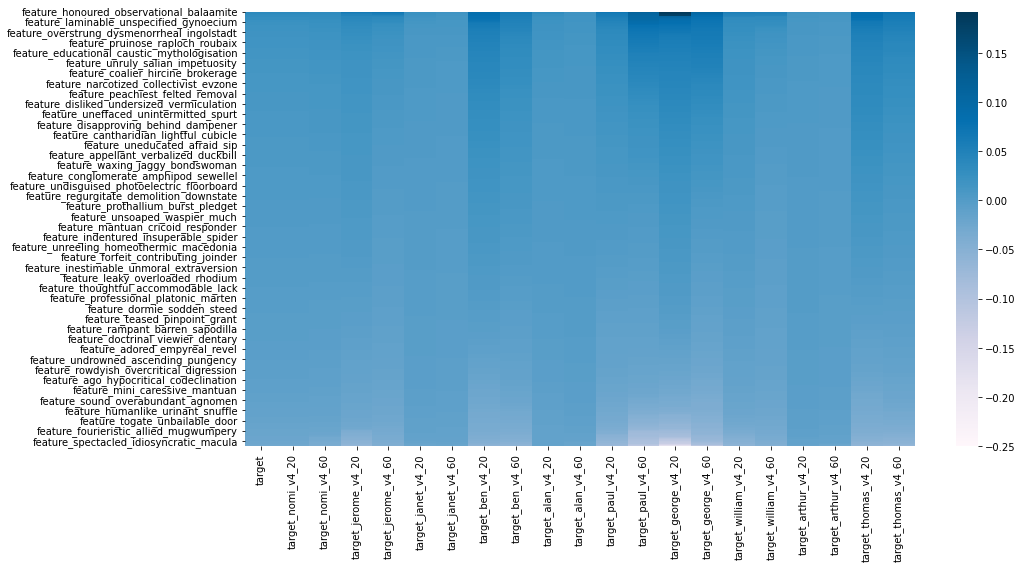

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_df, cmap='PuBu')

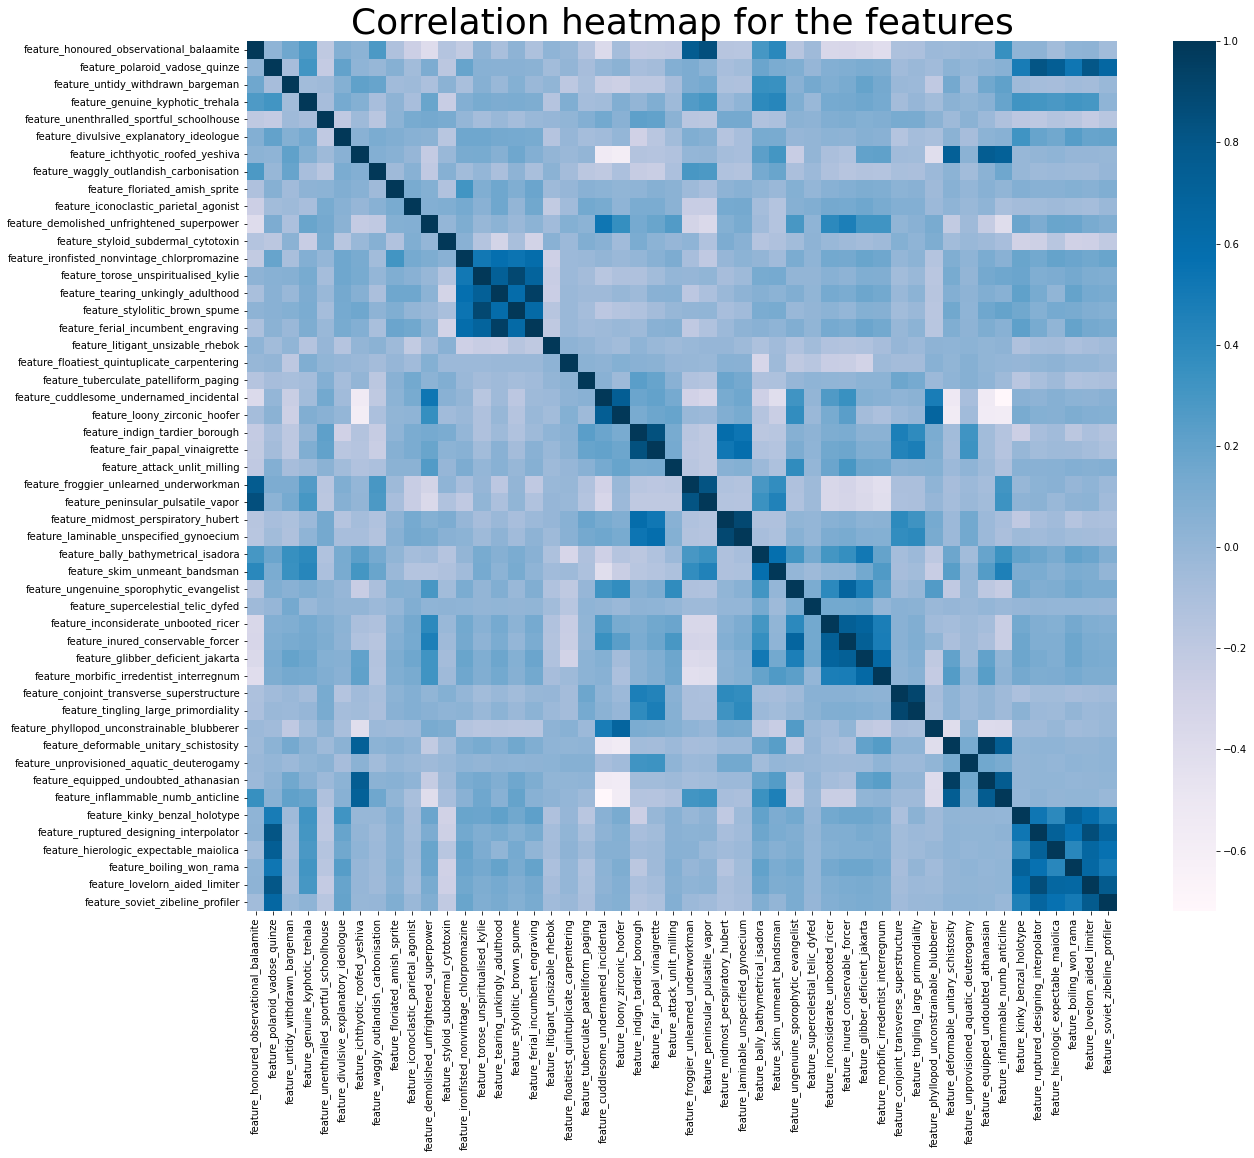

In [11]:
# Heatmap Feature Correlation (only looking at the first 25 features)
def heat_mat(df, features):
    # Calculating the correlation
    corrmat = df[features[:50]].corr()

    f, ax = plt.subplots(figsize=(20, 16))

    sns.heatmap(corrmat, square = True, cmap = 'PuBu')
    plt.title('Correlation heatmap for the features', fontsize=36)

heat_mat(era_df, features)

plt.savefig('photo/features_heatmap_pic.png')

Plot shows the correlation between features -- dark blue => high correlation

<AxesSubplot:xlabel='target_alan_v4_60', ylabel='feature_torose_unspiritualised_kylie'>

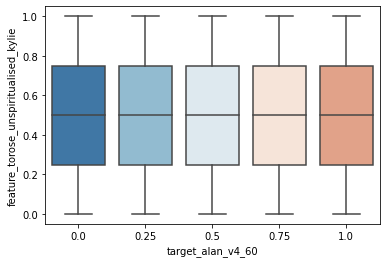

In [12]:
sns.set_palette('RdBu_r')
sns.boxplot(data = era_df, y='feature_torose_unspiritualised_kylie', x='target_alan_v4_60')

<AxesSubplot:xlabel='target_thomas_v4_60', ylabel='feature_torose_unspiritualised_kylie'>

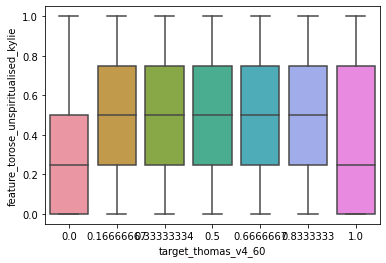

In [13]:
sns.boxplot(data = era_df, y='feature_torose_unspiritualised_kylie', x='target_thomas_v4_60')

/var/folders/_0/541h7pgs06l9wr3xp3jssnsc0000gn/T/ipykernel_26347/3543386546.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


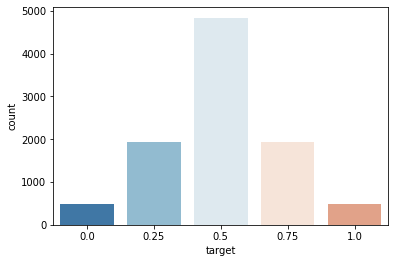

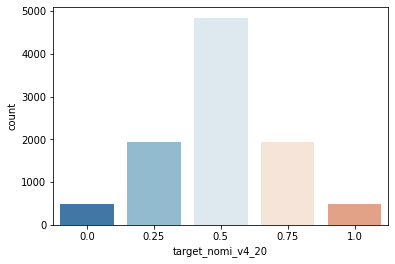

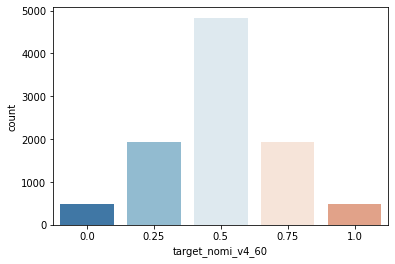

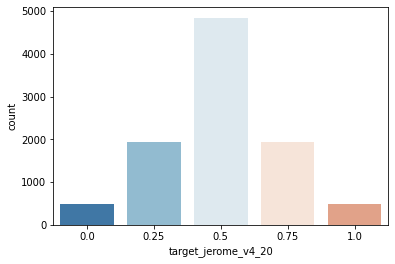

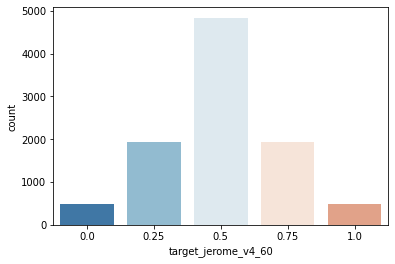

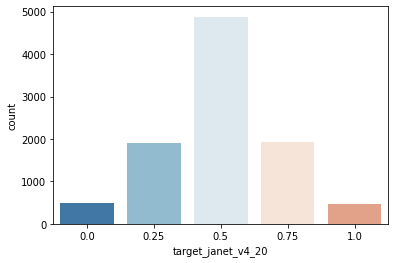

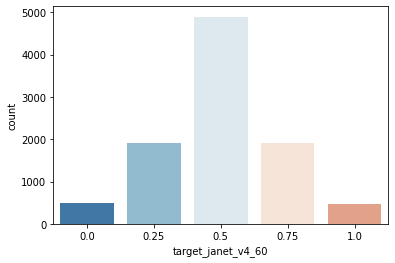

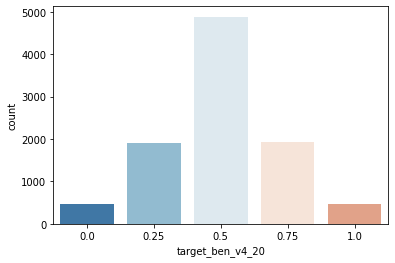

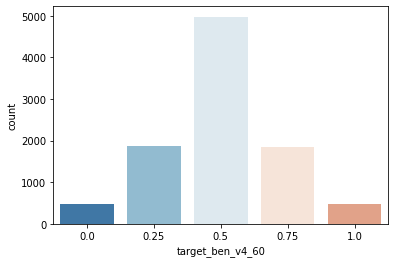

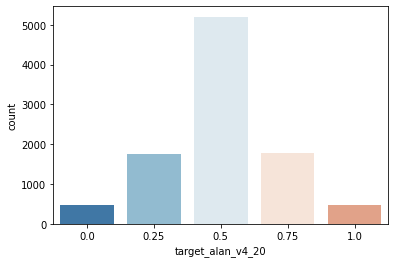

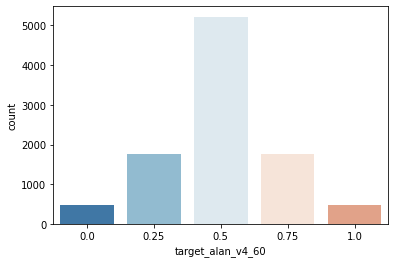

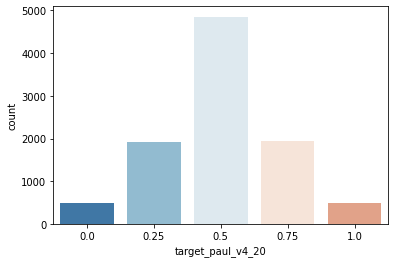

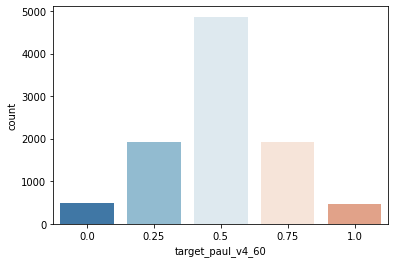

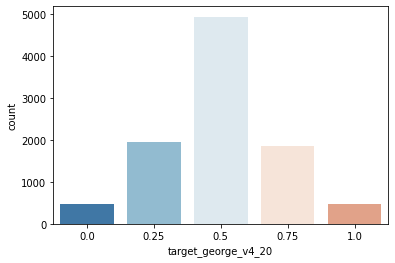

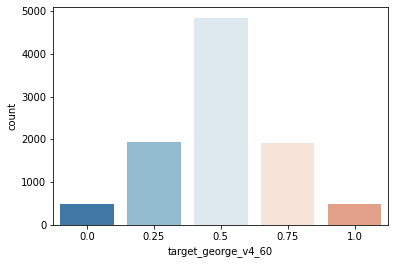

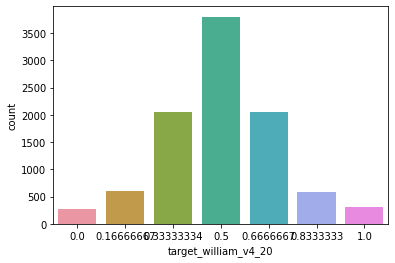

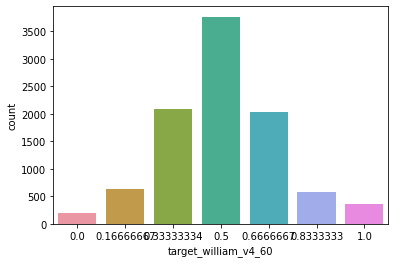

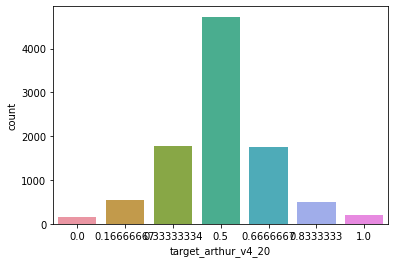

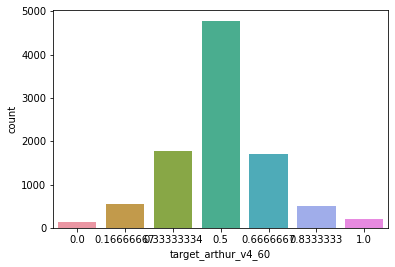

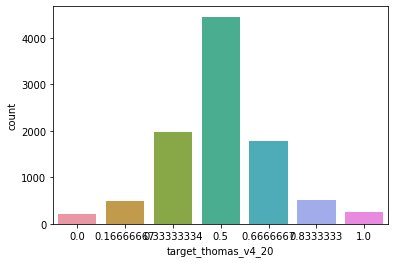

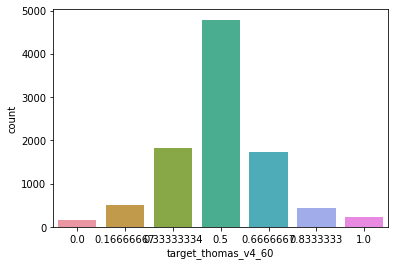

In [14]:
# Countplot Targets
def plot_target_correlation(df, targets):
    for i, col in enumerate(targets):
        plt.figure(i)
        sns.countplot(x=col, data=df)

plot_target_correlation(era_df, targets)

In [15]:
def linear_reg(era_df, targets, features):

    linreg_acc_score_list = []
    X = era_df[features]
    
    for i in range(len(targets)):
        
        y = era_df[targets[i]]  # Loop through all targets
        y = y.replace(np.nan, 0)     # Drop null items

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Define model
        lin_model = LinearRegression()
        # Fit training data to model
        lin_model.fit(X_train, y_train)

        # Predict on test set
        y_pred = lin_model.predict(X_test)
        # Getting accuracy score (using r2_score metric)
        acc_score = r2_score(y_test, y_pred)
        
        # Append item to the score list
        linreg_acc_score_list.append(acc_score)

    return linreg_acc_score_list

In [16]:
def knn_classifier_score(era_df, targets, features):
    knn_acc_score_list = []
    X = era_df[features]
    
    for i in range(len(targets)):
        
        y = era_df[targets[i]]  # Loop through all targets
        y = y.replace(np.nan, 0)     # Drop null items

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        lab_enc = preprocessing.LabelEncoder()
        y_train_encoded = lab_enc.fit_transform(y_train)  # Encoded cuz getting 'continuous' variable error
        y_test_encoded = lab_enc.fit_transform(y_test)    # Encoded cuz getting 'continuous' variable error

        # Using Euclidean metric for K-Nearest Neighbor
        # Define model
        knn = KNeighborsClassifier(n_neighbors=100, weights='distance', metric='euclidean', n_jobs=-1)
        # Fit training data to model
        knn.fit(X_train, y_train_encoded)

        # Predict on test set
        y_pred = knn.predict(X_test)
        # Getting accuracy score (using accuracy_score metric)
        acc_score = accuracy_score(y_test_encoded, y_pred)
        
        # Append item to the score list
        knn_acc_score_list.append(acc_score)

    return knn_acc_score_list


In [17]:
era_df

,era,data_type,feature_honoured_observational_balaamite,feature_polaroid_vadose_quinze,feature_untidy_withdrawn_bargeman,feature_genuine_kyphotic_trehala,feature_unenthralled_sportful_schoolhouse,feature_divulsive_explanatory_ideologue,feature_ichthyotic_roofed_yeshiva,feature_waggly_outlandish_carbonisation,...,target_paul_v4_20,target_paul_v4_60,target_george_v4_20,target_george_v4_60,target_william_v4_20,target_william_v4_60,target_arthur_v4_20,target_arthur_v4_60,target_thomas_v4_20,target_thomas_v4_60
id,,,,,,,,,,,,,,,,,,,,,
n002a15bc5575bbb,0579,validation,0.25,0.00,0.25,0.00,0.75,0.25,0.50,0.50,...,0.25,0.50,0.25,0.25,0.333333,0.333333,0.500000,0.333333,0.333333,0.500000
n00309caaa0f955e,0579,validation,0.50,0.00,0.50,0.50,0.50,0.50,0.25,0.50,...,0.50,0.75,0.50,0.50,0.666667,0.666667,0.666667,0.666667,0.500000,0.666667
n00576b397182463,0579,validation,1.00,0.75,0.25,1.00,0.75,0.75,0.75,0.75,...,0.50,0.50,0.50,0.50,0.500000,0.500000,0.500000,0.333333,0.500000,0.666667
n00633405d59c6a1,0579,validation,0.75,0.25,0.25,0.50,1.00,0.75,0.00,0.75,...,1.00,1.00,1.00,0.75,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
n008c2eefc8911c7,0579,validation,0.00,0.75,0.75,0.50,0.50,0.25,1.00,0.25,...,0.50,0.50,0.50,0.50,0.500000,0.500000,0.500000,0.500000,0.333333,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffc900b5e05ff5e,0615,validation,0.75,0.50,0.25,0.00,0.50,0.75,0.75,0.50,...,0.50,0.50,0.50,0.50,0.500000,0.500000,0.333333,0.500000,0.333333,0.500000
nffd99d709b14c15,0615,validation,0.75,0.00,1.00,0.50,0.25,1.00,0.25,0.00,...,1.00,1.00,1.00,1.00,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000
nffdbc623e131925,0615,validation,1.00,0.50,0.00,0.25,1.00,0.75,0.75,0.75,...,0.75,0.50,0.50,0.25,0.666667,0.333333,0.833333,0.500000,0.500000,0.333333


In [18]:
era_df['era'].unique()

array(['0579', '0615'], dtype=object)

In [19]:
knn_score_df = pd.DataFrame(targets, columns=['Targets'])
# KNN Classifier
era_list = era_df['era'].unique()
# Looping thru all the chosen eras
for i in range(len(era_list)):  
  
  era_name = era_list[i]
  # Looking at the era column
  individual_era_df = era_df.loc[era_df['era'] == era_name]

  # create era name for dataframe later
  col_name = "era " + era_name

  # Getting accuracy score list
  knn_score_list = knn_classifier_score(individual_era_df, targets, features)
  # Add the list as a new column in the dataframe
  knn_score_df[col_name] = knn_score_list

In [20]:
# Look at the result that we have as a dataframe
print("KNN Accuracy Score")
knn_score_df

KNN Accuracy Score


,Targets,era 0579,era 0615
0,target,0.501037,0.521291
1,target_nomi_v4_20,0.501037,0.521291
2,target_nomi_v4_60,0.507947,0.519918
3,target_jerome_v4_20,0.503801,0.495879
4,target_jerome_v4_60,0.517623,0.503434
5,target_janet_v4_20,0.507947,0.520604
6,target_janet_v4_60,0.517623,0.497940
7,target_ben_v4_20,0.501037,0.513736
8,target_ben_v4_60,0.500346,0.517170
9,target_alan_v4_20,0.515549,0.577610


In [21]:
# Linear Regression 
linreg_score_df = pd.DataFrame(targets, columns=['Targets'])

# Looping thru all the chosen eras
for i in range(len(era_list)):

  era_name = era_list[i]
  # Looking at the era column
  individual_era_df = era_df.loc[era_df['era'] == era_name]    

  # create era name for dataframe later
  col_name = "era " + era_list[i]

  # Getting R2 Score list
  linReg_score_list = linear_reg(individual_era_df, targets, features)
  # Add the list as a new column in the dataframe
  linreg_score_df[col_name] = linReg_score_list

In [22]:
# Look at the result that we have as a dataframe
print("LinReg R2 Score")
linreg_score_df

LinReg R2 Score


,Targets,era 0579,era 0615
0,target,-0.572951,-0.454732
1,target_nomi_v4_20,-0.572951,-0.454732
2,target_nomi_v4_60,-0.481401,-0.494409
3,target_jerome_v4_20,-0.546154,-0.331051
4,target_jerome_v4_60,-0.524758,-0.366384
5,target_janet_v4_20,-0.956165,-0.764568
6,target_janet_v4_60,-0.842203,-0.852139
7,target_ben_v4_20,-0.549037,-0.333962
8,target_ben_v4_60,-0.430392,-0.403221
9,target_alan_v4_20,-0.866679,-0.747988
